In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
%matplotlib inline

In [0]:
voice = pd.read_csv("/content/drive/My Drive/dataset/voice.csv")

In [0]:
voice['label']  = voice['label'].astype('category').cat.codes

In [0]:
corr_voice = voice.corr('pearson')
corr_voice['label'].sort_values()

meanfun    -0.833921
Q25        -0.511455
meanfreq   -0.337415
centroid   -0.337415
median     -0.283919
maxdom     -0.195657
mindom     -0.194974
dfrange    -0.192213
meandom    -0.191067
mode       -0.171775
maxfun     -0.166461
minfun     -0.136692
modindx     0.030801
skew        0.036627
Q75         0.066906
kurt        0.087195
sfm         0.357499
sd          0.479539
sp.ent      0.490552
IQR         0.618916
label       1.000000
Name: label, dtype: float64

In [0]:
features = voice.iloc[:, :-1]
target = voice.iloc[:,-1]

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

In [0]:
xtrain, xtest, ytrain, ytest = train_test_split(features,target, test_size=0.3)

In [0]:
xtest[:, [5,12]]

array([[0.67098314, 0.78906782],
       [0.35089389, 0.20195093],
       [0.37932817, 0.3805814 ],
       ...,
       [0.59421924, 0.2998492 ],
       [0.46924445, 0.62431856],
       [0.4424503 , 0.44187372]])

In [0]:
basex = xtrain[:, [5,12]]
basey = np.array(ytrain)

xtest = xtest[:, [5,12]]
ytest = np.array(ytest)

In [0]:
basex[:,1].reshape(-1,1)

array([[0.68450726],
       [0.21986896],
       [0.66827192],
       ...,
       [0.54312546],
       [0.6587583 ],
       [0.71587225]])

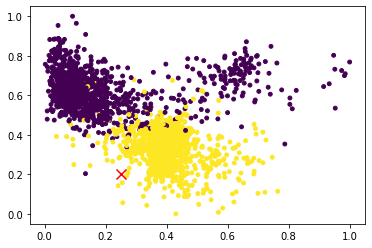

In [0]:
plt.scatter(basex[:,0].reshape(-1,1), basex[:,1].reshape(-1,1), c=basey, s=15)
plt.scatter(0.25, 0.2, c='red', marker='x', s=100)

In [0]:
# Calculate Distance between any two given points
def euclid_distance(train_point, given_point):
    distance = np.sum((train_point-given_point)**2)
    return np.sqrt(distance)


In [0]:
# Calculate distance from a given point to all other points
# and keep track of the respective classes for those distances
# and eventually return sorted list of distances
def calc_distance_from_all(all_points, given_point, predictions):
    all_distances = []
    for i, each in enumerate(all_points):
        distance = euclid_distance(each, given_point)
        all_distances.append((distance,int(predictions[i])))
    all_distances.sort(key=lambda mytup: mytup[0])
    return all_distances

In [0]:
# Get the "n" defined neighbours from a list of sorted distances
def get_neighbours(distances, count):
    return distances[:count]


In [0]:
# Takes a given point and predicts the class based on all other points
def predict(all_points, given_point, predictions):
    distances = calc_distance_from_all(all_points,given_point,predictions)
    neighbours = get_neighbours(distances, 3)
    op = [row[-1] for row in neighbours]
    prediction = max(op, key=op.count)
    return prediction



# Get how accurate our system is based on a new set of test points
# for which we already know the right answer to
def accuracy(basex, basey, testx, testy):
    correct = 0 
    
    for i in range(len(testx)):
        p = predict(basex, testx[i], basey)
        if p == testy[i]:
            correct += 1
            
    return f"Accuracy: {correct*100/len(testy)}%"

In [0]:
xtrain[0]

array([0.83054183, 0.13073573, 0.81021339, 0.80003129, 0.80368033,
       0.06616135, 0.06928806, 0.00565218, 0.33722863, 0.13743607,
       0.79623824, 0.83054183, 0.68450726, 0.19235647, 0.97257028,
       0.24433102, 0.04086022, 0.18727663, 0.18669528, 0.12386645])

In [0]:
ytrain.values[0]

0

In [0]:
predict(basex, xtest[0], ytrain.values)

0

In [0]:
accuracy(basex, ytrain.values, xtest, ytest)

'Accuracy: 96.84542586750788%'